### Comenzamos con la ST simplificada

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
  
import statsmodels.tsa.stattools as sts 
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sns.set()

In [2]:
raw_csv_data = pd.read_csv("Index2018.csv") 
df_comp = raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
df_comp.set_index("date", inplace=True)
df_comp = df_comp.asfreq('b')
df_comp

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.900000,2224.95,3445.980000,18124.01
1994-01-10,475.270000,2225.00,3440.580000,18443.44
1994-01-11,474.130000,2228.10,3413.770000,18485.25
1994-01-12,474.170000,2182.06,3372.020000,18793.88
1994-01-13,472.470000,2142.37,3360.010000,18577.26
...,...,...,...,...
2018-01-23,2839.130362,13559.60,7731.827774,24124.15
2018-01-24,2837.544008,13414.74,7643.428966,23940.78
2018-01-25,2839.253031,13298.36,7615.839954,23669.49


In [3]:
print(df_comp.isna().sum())
df_comp = df_comp.ffill()
print(df_comp.isna().sum())
df_comp

spx       8
dax       8
ftse      8
nikkei    8
dtype: int64
spx       0
dax       0
ftse      0
nikkei    0
dtype: int64


,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.900000,2224.95,3445.980000,18124.01
1994-01-10,475.270000,2225.00,3440.580000,18443.44
1994-01-11,474.130000,2228.10,3413.770000,18485.25
1994-01-12,474.170000,2182.06,3372.020000,18793.88
1994-01-13,472.470000,2142.37,3360.010000,18577.26
...,...,...,...,...
2018-01-23,2839.130362,13559.60,7731.827774,24124.15
2018-01-24,2837.544008,13414.74,7643.428966,23940.78
2018-01-25,2839.253031,13298.36,7615.839954,23669.49


In [4]:
df_comp['market_value'] = df_comp.spx

In [5]:
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']
# Dividimos los datos en training y test
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

In [6]:
df_comp

,market_value
date,
1994-01-07,469.900000
1994-01-10,475.270000
1994-01-11,474.130000
1994-01-12,474.170000
1994-01-13,472.470000
...,...
2018-01-23,2839.130362
2018-01-24,2837.544008
2018-01-25,2839.253031


### White Noise
Vamos a ver como se compara el ruido blanco con una Serie Temporal (la de valores)

La función de numpy `np.random.normal()` crea una matriz de valores aletorios de distribución normal. Para que sea comparable a la ST anterior le pasamos la media, desviación estándar y la longitud.

location (loc) = media - parametro de localizacion

scale = escala , desviacion estandar, std


In [7]:
''' En la función tenemos que loc es del centro/media de la distribución
luego, scale es la desviación estándar y size es el tamaño de la muestra
'''
wn = np.random.normal(loc = df.market_value.mean(), scale = df.market_value.std(), size = len(df))

In [8]:
wn

array([ 452.52393403,  936.75908355, 1277.11553692, ..., 1104.64907339,
       1082.21357525,  672.70424028])

In [9]:
df = df.assign(wn = wn)

In [10]:
df

,market_value,wn
date,,
1994-01-07,469.900000,452.523934
1994-01-10,475.270000,936.759084
1994-01-11,474.130000,1277.115537
1994-01-12,474.170000,1262.295628
1994-01-13,472.470000,1828.508048
...,...,...
2013-04-01,1562.173837,1261.309425
2013-04-02,1570.252238,888.952295
2013-04-03,1553.686978,1104.649073


In [11]:
df.describe()

,market_value,wn
count,5021.000000,5021.000000
mean,1091.651926,1094.149274
std,292.559287,290.492696
min,438.920000,-101.937986
25%,914.620000,900.415810
50%,1144.650000,1096.447429
75%,1316.280729,1288.561890
max,1570.252238,2112.749153


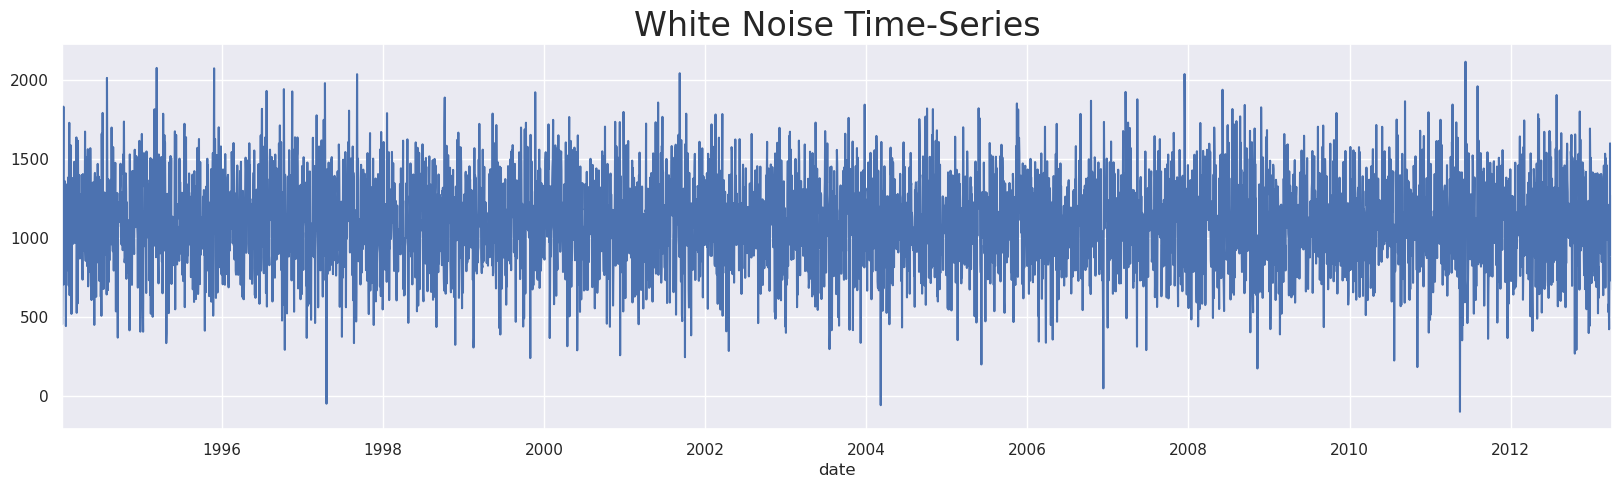

In [12]:
''' Sale como indice ya las fechas; por otro lado  vemos el comportamiento 
aleatorio sin patrón alrededor de la media, no se puede predecir valores nuevos'''

# Recordar que Pandas trae un wrapper para matplotlib
df.wn.plot(figsize = (20,5))
plt.title("White Noise Time-Series", size= 24)
plt.show()

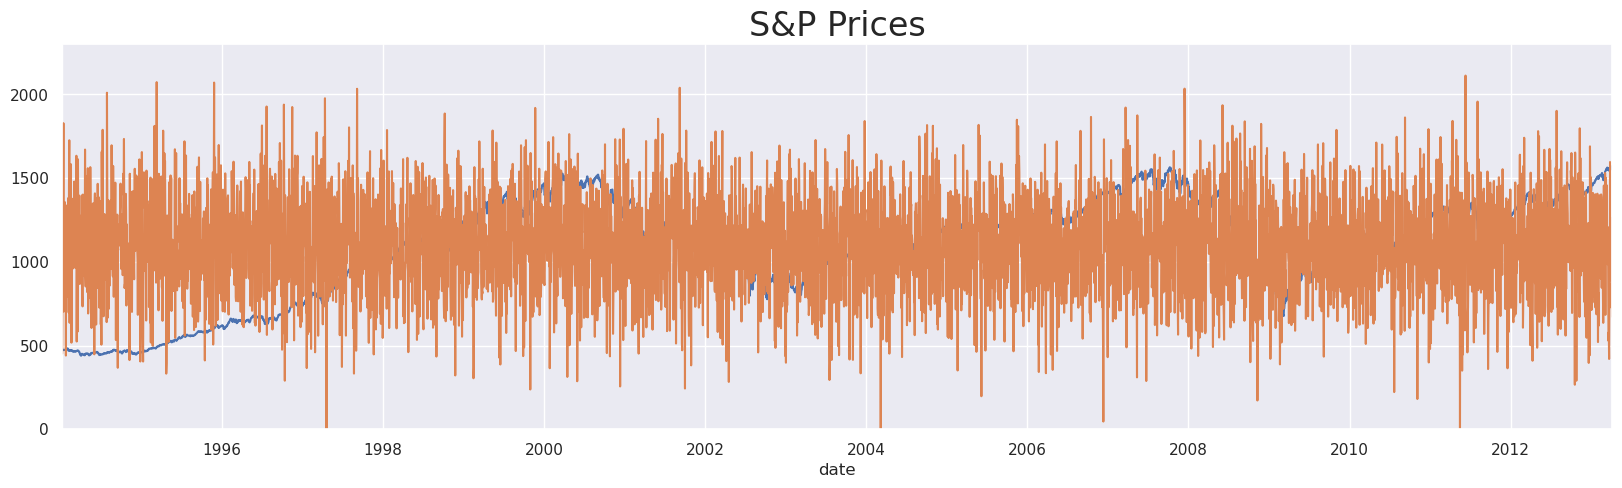

In [13]:
df.market_value.plot(figsize=(20,5))
df.wn.plot(figsize = (20,5))
plt.title("S&P Prices", size = 24)
plt.ylim(0,2300)
plt.show()

### Random Walk

In [14]:
rw = pd.read_csv("RandWalk.csv")
rw.head()

,date,price
0,07/01/1994,1122.139662
1,08/01/1994,1135.238562
2,09/01/1994,1109.897831
3,10/01/1994,1080.347860
4,11/01/1994,1082.095245


In [15]:
rw.date = pd.to_datetime(rw.date, dayfirst = True)
# Hacemos la transformación a tipo fecha y que sea el índice ... como en la clase anterior
rw.set_index("date", inplace = True)
rw.head()

,price
date,
1994-01-07,1122.139662
1994-01-08,1135.238562
1994-01-09,1109.897831
1994-01-10,1080.347860
1994-01-11,1082.095245


In [16]:
rw = rw.asfreq('b')
# frecuencia se pone solo a dias laborales (business days)
rw.describe()

,price
count,5021.000000
mean,1269.944293
std,444.216793
min,585.483034
25%,931.550429
50%,1156.363045
75%,1488.362029
max,2715.508720


In [17]:
df.head()

,market_value,wn
date,,
1994-01-07,469.90,452.523934
1994-01-10,475.27,936.759084
1994-01-11,474.13,1277.115537
1994-01-12,474.17,1262.295628
1994-01-13,472.47,1828.508048


In [18]:
# Creamos una nueva columna en el dataframe df con los precios de la caminata aleatoria
df = df.assign(rw = rw.price)

In [19]:
df.head()

,market_value,wn,rw
date,,,
1994-01-07,469.90,452.523934,1122.139662
1994-01-10,475.27,936.759084,1080.347860
1994-01-11,474.13,1277.115537,1082.095245
1994-01-12,474.17,1262.295628,1083.639265
1994-01-13,472.47,1828.508048,1067.146255


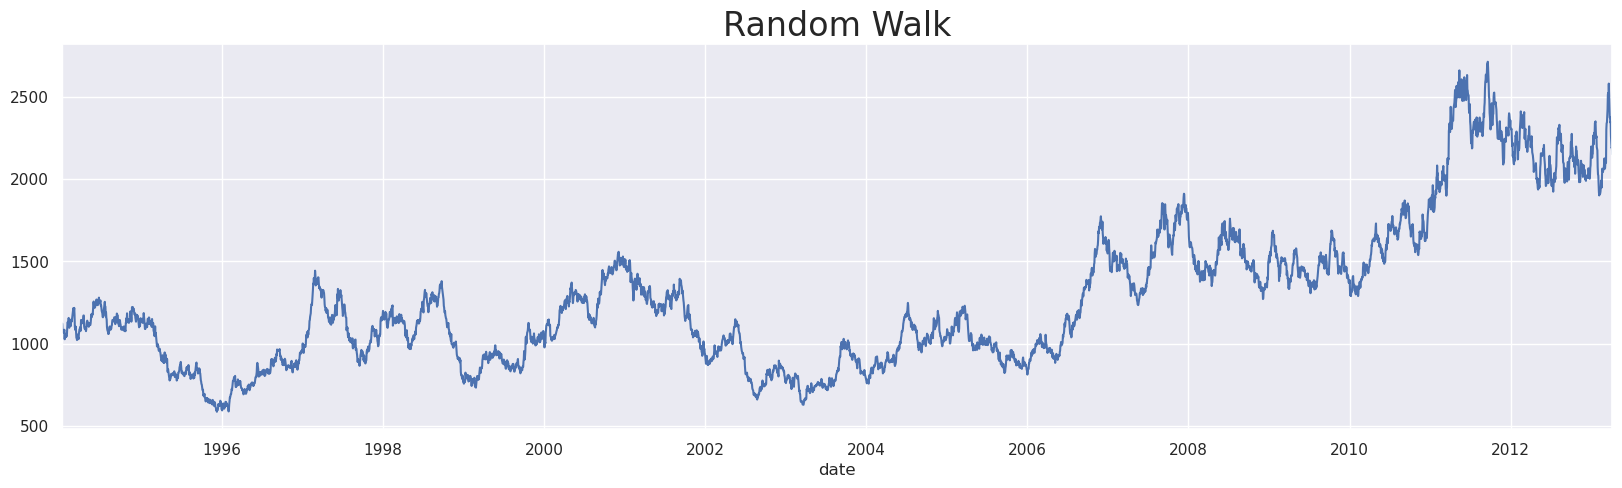

In [20]:
df.rw.plot(figsize = (20,5))
plt.title("Random Walk", size = 24)
plt.show()

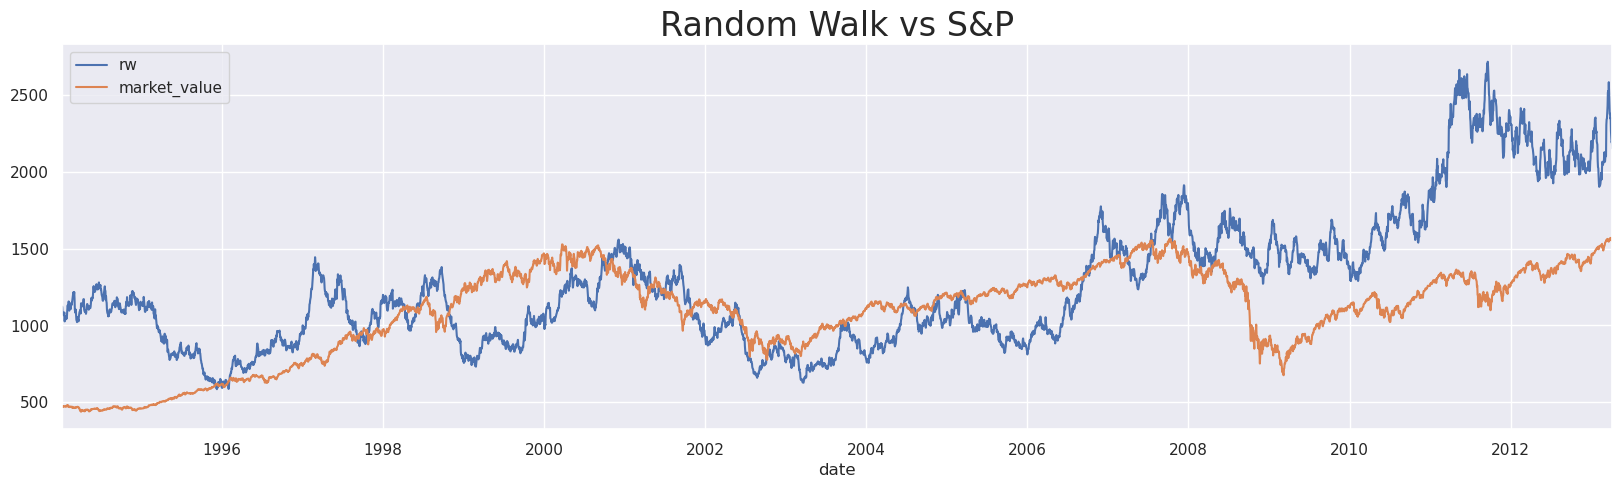

In [21]:
df.rw.plot(figsize = (20,5))
df.market_value.plot()
plt.title("Random Walk vs S&P", size = 24)
plt.legend() 
plt.show()

### Estacionariedad

Aquí realizamos el test de Dickey Fuller para en base a si $p \leq 0.05$, rechazar la hipótesis nula de no estacionariedad; dicho de otra forma, si $p \leq 0.05$ la serie temporal es estacionaria.

In [22]:
# La importación clave es 'import statsmodels.tsa.stattools as sts'
sts.adfuller(df.market_value) #SP500

# SEGUNDO: P VALOR: 0.41 - SE COMPARA CON 0.01, 0.1, 0.05 - NO SE PUEDE RECHAZAR H0 - SIGUE SIENDO NO ESTACIONARIA
# SERIE NO ESTACIONARIA

(-1.7369847452352436,
 0.4121645696770623,
 18,
 5002,
 {'1%': -3.431658008603046,
  '5%': -2.862117998412982,
  '10%': -2.567077669247375},
 39904.880607487445)

In [23]:
sts.adfuller(df.wn)

# EL RUIDO BLANCO ES ESTACIONARIO.
# p: valor es 0.0, se rechaza la hipótesis
# serie estacionaria
# 0 no hay retrasos

(-71.53152875769084,
 0.0,
 0,
 5020,
 {'1%': -3.431653316130827,
  '5%': -2.8621159253018247,
  '10%': -2.5670765656497516},
 70726.7730217284)

In [24]:
sts.adfuller(df.rw)
# Obtenemos un p de 0.61, por lo cual no se puede rechazar la hipótesis nula
# y la serie no es estacionaria

(-1.3286073927689694,
 0.6159849181617395,
 24,
 4996,
 {'1%': -3.4316595802782865,
  '5%': -2.8621186927706463,
  '10%': -2.567078038881065},
 46299.333497595144)

### Seasonality / Estacionalidad

Caso de pasajeros de avión

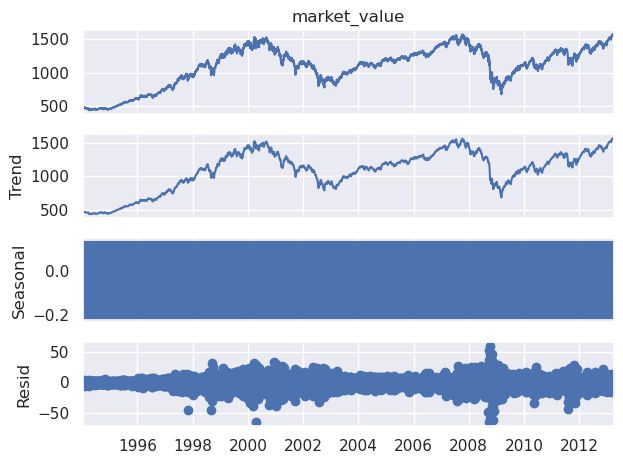

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose
s_dec_additive = seasonal_decompose(df.market_value, model = "additive")
s_dec_additive.plot()
plt.show()

# PRIMER GRAFICO: SERIE ORIGINAL
# SEGUNDO GRAFICO: TENDENCIA /TREND. LA TENDENCIA SE PARECE A LA SERIE PORQUE SE BASA EN USAR EL ELEMENTO ANTERIOR. 
# EXPLICA LA MAYOR PARTE DE LA VARIABILIAD DE LOS DATOS

# TERCERO: SEASONAL /ESTACIONALIDAD. VALORES OSCIALNDO (AUNQUE PARECE UN RECTANGULO) - NO HAY UNPATRON CICLICO CONCRETO - SO HAY ESTACIONALIAD

# RESIDUOS: ERRORES DE LAS ESTIMACIONES DEL MODELO.VARIAN MAS ALREDEDOR DE 2008 Y 2000 POR LASBURBUJAS - LOS ERRORES SON MAYOR
# EN ESAS FECHAS
# ESTOS RESULTADOS QUE NO HAY ESTACIONALIAD EN LOS DATOS

In [26]:
s_dec_additive

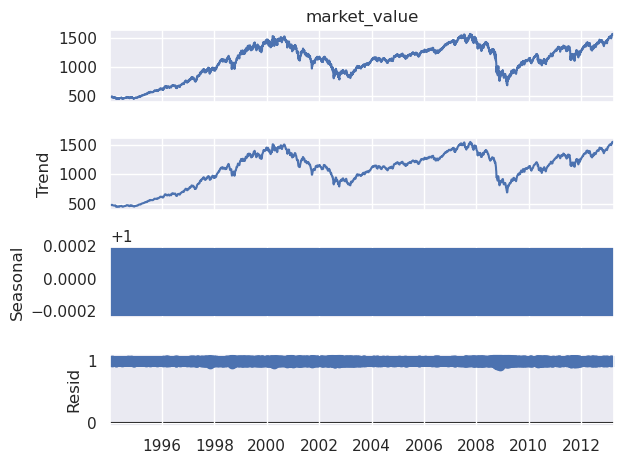

In [27]:
s_dec_multiplicative = seasonal_decompose(df.market_value, model = "multiplicative")
s_dec_multiplicative.plot()
plt.show()
#PARA ESTAR SEGUROS LO HACEMOS TAMBIEN CON LA DESCOMPOSICION MULTIPLICATIVA
# LOS RESULTADOS SON LOS MISMOS

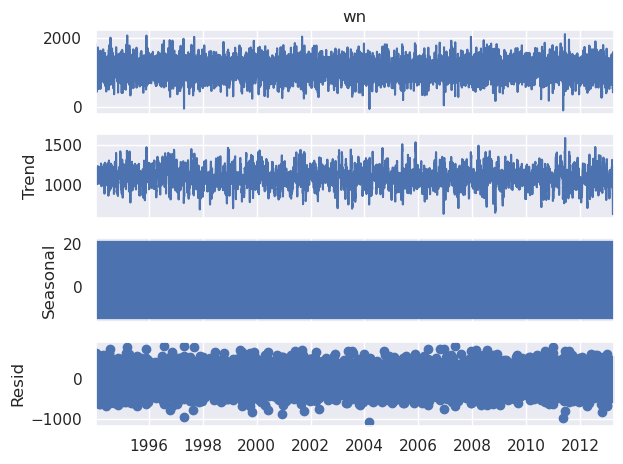

In [28]:
s_dec_multiplicative = seasonal_decompose(df.wn, model = "aditive")
s_dec_multiplicative.plot()
plt.show()

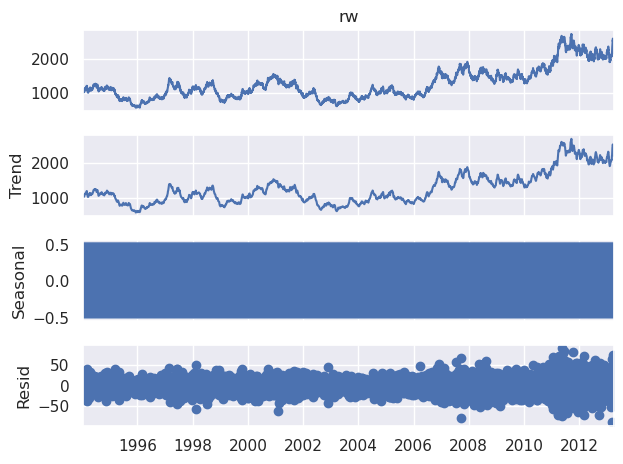

In [29]:
# Por defecto hace el aditivo
s_dec_multiplicative = seasonal_decompose(df.rw)
s_dec_multiplicative.plot()
plt.show()

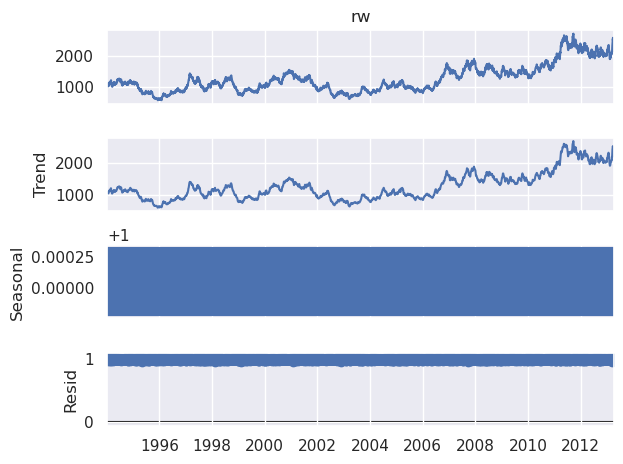

In [30]:
s_dec_multiplicative = seasonal_decompose(df.rw, model = "multiplicative")
s_dec_multiplicative.plot()
plt.show()

### ACF

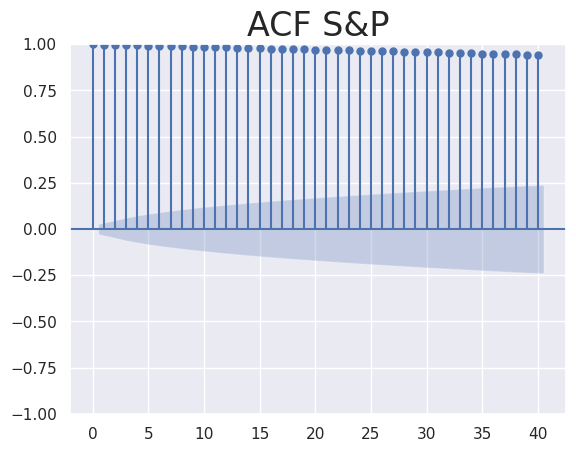

In [31]:
# los lags son los retrasos maximos que se van a considerar - sino calcula la longitud de toda la serie
# 40 es un estándar
# zero: indica si se incluye el valor actual en los cálculos, sería entre x(t) y x(t) siempre sera uno - en general se ignora

import statsmodels.graphics.tsaplots as sgt 
import matplotlib.pyplot as plt 

sgt.plot_acf(df.market_value, lags = 40)
plt.title("ACF S&P", size = 24)
plt.show()

# Eje X retrasos, eje y valores de coeficiente de autocorrelacion (de -1 a 1)
# aqui todos son positivos, todos tienen correlación positiva
# la primera línea es la autocorrelación entre x(t) y x(t-1), la segunda con x(t-2)
# los periodos son días 

# el area azul representa la significacion de los valores de autocorrelacion, miden si son significativamente disitntos de 0
#este area se expanda al incrementar t, a mayor distancia en el tiempo mas improbable es que la correlacion exista
# los precios de hoy estaran mas relacionados con los de ayer que con los de hace un mes
# en general si la barra sale de la franja azul es significativo

# la autocorrelacion apenas disminuye - esto sugiere que los precios incluso un mes atras, 
# auun pueden servir como estimaciones del precio de hoy

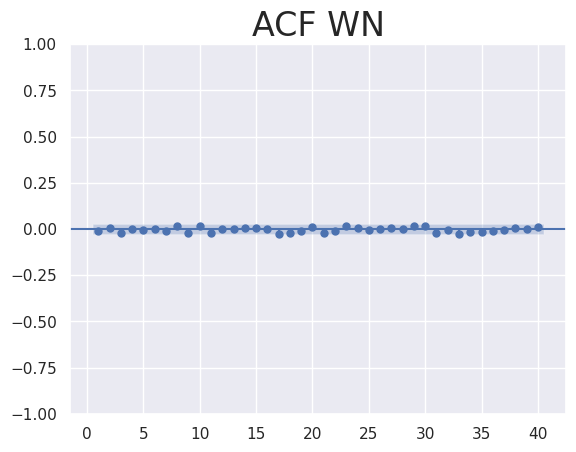

In [32]:
sgt.plot_acf(df.wn, lags = 40, zero = False)
plt.title("ACF WN", size = 24)
plt.show()

# valor de autocorrelacion de ruido blanco
# los valores indican que no hay autocorrelacion, cambian positivos a negativo y son valores minimos y ademas
#las lineas caen dentro de la region azul, con lo que los coeficientes no son significativos - 
# No hay autocorrelacion para ningun retraso, por definicion del ruido blanco
# si se sale de la caja azul es algo aleatorio


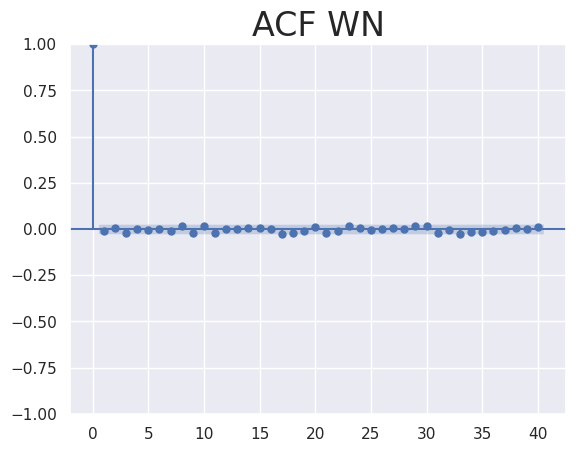

In [33]:
sgt.plot_acf(df.wn, lags = 40)
plt.title("ACF WN", size = 24)
plt.show()

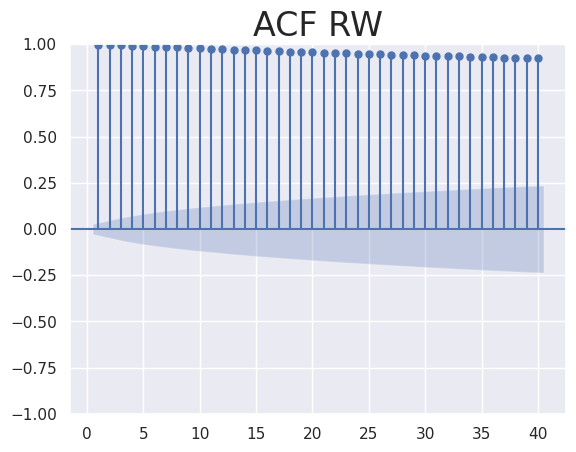

In [34]:
sgt.plot_acf(df.rw, lags = 40, zero = False)
plt.title("ACF RW", size = 24)
plt.show()

# La caminata aleatoria es como los precios del SP al ser una ST parecida

# Ver líneas aéreas ACF

### PACF

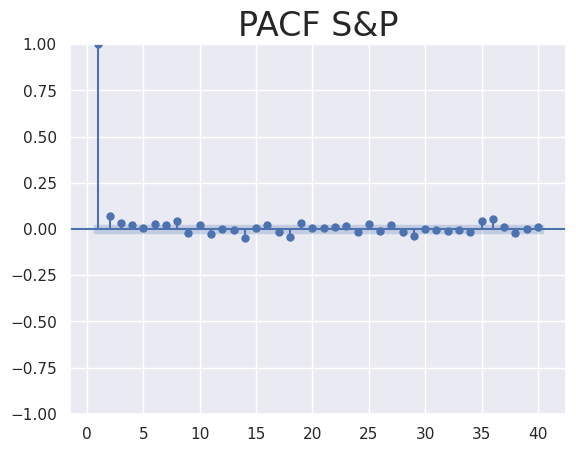

In [35]:
sgt.plot_pacf(df.market_value, lags = 40, zero = False, method = 'ols') # aquie se le pasa el metodo para determinar la correlacion parcial
#aqui se usa Ordinary Least Squares

plt.title("PACF S&P", size = 24)
plt.show()

# EL area en azul es el area de significacion.SOlo los primeros elementos son significativamente disintos de 0
# los hay negativos tambien 
# este metodo cancela los canales adicionales - no considera los efectos intermedio o indirectos como afectan al dia presente
#el primer valor de PACF y ACF son identicos porque no hay canales adicionales para el primer caso
# es decir no hay nada en el medio

# a partir del tercer retraso ya no son significativos


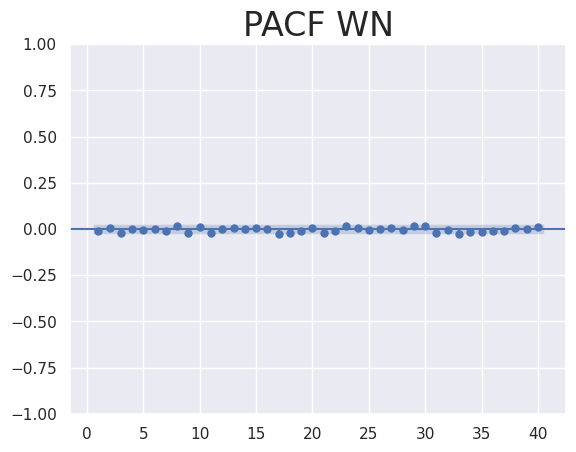

In [36]:
sgt.plot_pacf(df.wn, lags = 40,  zero = False,  method = 'ols')
plt.title("PACF WN", size = 24)
plt.show()

# con ruido blanco no hay autocorrelacion- por lo tanto tampoco PACF 
#todos los coeficiones son no significativos - no hay autocorrelacion en el ruido blanco

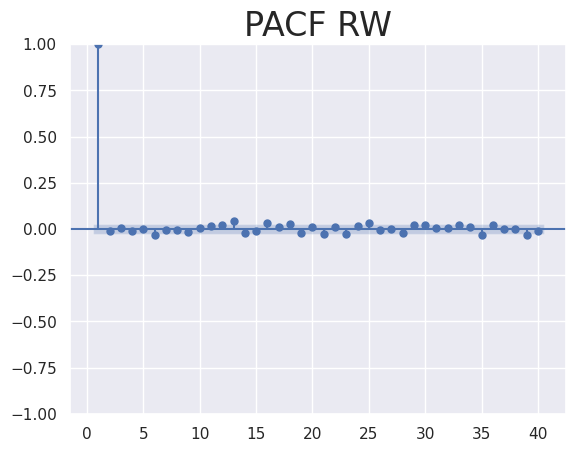

In [37]:
sgt.plot_pacf(df.rw, lags = 40, zero = False, method = 'ols')
plt.title("PACF RW", size = 24)
plt.show()

#la caminata aleatoria se parece mas a los precios ...